In [539]:
#Import pandas
import pandas as pd

In [540]:
#Import dataset
df = pd.read_csv('Historical Product Demand.csv', parse_dates = ['Date'])

In [541]:
#Check out the first 5 rows of data set
df[:5]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


This dataset includes information from hostorical
product orders.

In [542]:
#Check out the shape of the data set
df.shape

(1048575, 5)

The data set has 1,048,575 rows and 5 columns. 

In [543]:
#What type of data is in each column?
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                object
dtype: object

The date column is the only integer. We will most likely have to change the type of data in one or more of the columns. 

In [544]:
#Number of unique products in product code
len(df['Product_Code'].unique())

2160

In [545]:
#Number of unique product categories
len(df['Product_Category'].unique())

33

There are 2,160 unique product codes across 33 different product categories

In [546]:
#Which warehouse sends the most products?
df['Warehouse'].value_counts().sort_values(ascending = False)

Whse_J    764447
Whse_A    153574
Whse_S     88200
Whse_C     42354
Name: Warehouse, dtype: int64

Warehouse J receives the most orders.

In [547]:
#Sort file in order of dates
dates = [pandas.to_datetime(date) for date in df['Date']]
dates.sort()

In [548]:
#What is the earliest date listed?
dates[0]

Timestamp('2011-01-08 00:00:00')

In [549]:
#What is the latest recorded date?
dates[1048574]

Timestamp('2017-01-09 00:00:00')

This data includes orders placed between January 8, 2011 and January 9, 2017 - 6 years of data. 

In [550]:
#Import matplotlib and rcParams
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [551]:
#From the read me file, I knew that some of the order demands had () in them. 
#Get rid of ().
#Change order demand data type to int64.
#These three lines of code were take from kashdotten (kaggle.com)
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")
df['Order_Demand'] = df['Order_Demand'].astype('int64')

In [552]:
#Check that the above worked
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

In [553]:
#What is the most commonly ordered product?
#Find the product with the maximum sum of order demands.
df.groupby(['Product_Code']).sum().idxmax()

Order_Demand    Product_1359
dtype: object

In [554]:
#There are two ways to do the above analysis, this is the second way - same result. 
df['Product_Code'].value_counts().idxmax()

'Product_1359'

Product 1359 is the most popular product.

In [555]:
#Create a new data set, only include Product 1359. 
product_1359 = df[df.Product_Code == 'Product_1359']

In [556]:
#See what the new data set looks like.
product_1359

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
276,Product_1359,Whse_J,Category_019,2012-04-18,80000
282,Product_1359,Whse_J,Category_019,2012-05-21,70000
289,Product_1359,Whse_J,Category_019,2012-06-26,80000
292,Product_1359,Whse_J,Category_019,2012-07-17,100000
296,Product_1359,Whse_J,Category_019,2012-08-24,100000
...,...,...,...,...,...
1046514,Product_1359,Whse_J,Category_019,2016-10-03,20000
1046515,Product_1359,Whse_J,Category_019,2016-09-16,10000
1046516,Product_1359,Whse_J,Category_019,2016-11-01,30000
1046517,Product_1359,Whse_J,Category_019,2016-12-01,20000


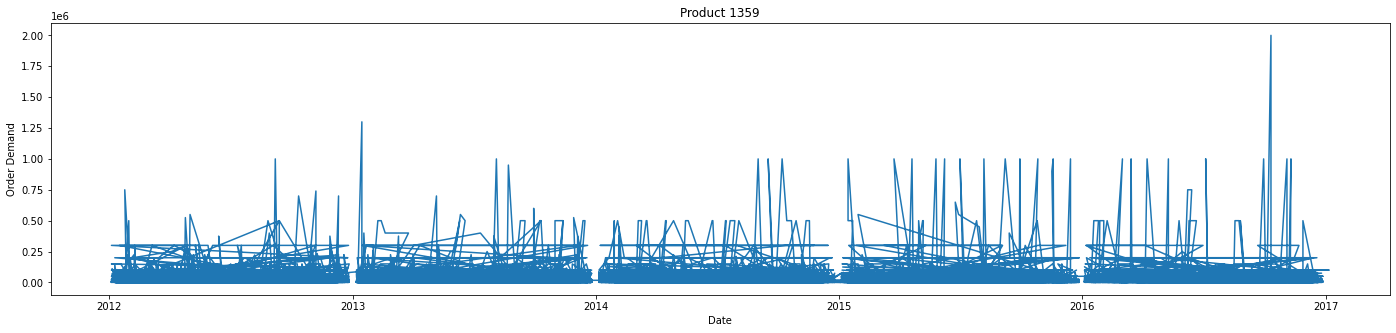

In [557]:
#What does 6 years of order demand look like for this product? 
#Adjust the figure size.
#Add title and axis labels.
rcParams['figure.figsize'] = 24,5
plt.title('Product 1359')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.plot(product_1359['Date'],product_1359['Order_Demand'])

You cannot make many conclusions from this chart, because it has so many data points. 

In [558]:
#See the timeframe in which this product was ordered. 
product_1359['Date'].min() , product_1359['Date'].max()

(Timestamp('2012-01-05 00:00:00'), Timestamp('2017-01-06 00:00:00'))

Product 1359 has been ordered between, January 5, 2012 and January 6, 2017 (5 years). We can probably notice some trends with only two years of data. 

In [559]:
#Only include the most recent two years of data and rename the data set.
two_yrs_1359 = product_1359[product_1359['Date'] >= '2015-01-06']

In [560]:
#We are only using date and order demand for this plot.
#So we can slim the data set down to just these two columns.
#In order to combine data points, order demand should be shown as a sum of each day.
#This command was adapted from kashdotten (kaggle.com)
two_yrs_1359.groupby('Date')['Order_Demand'].sum().reset_index()

,Date,Order_Demand
0,2015-01-06,603000
1,2015-01-07,539000
2,2015-01-08,541000
3,2015-01-09,185000
4,2015-01-13,440000
...,...,...
484,2016-12-22,180000
485,2016-12-26,286000
486,2016-12-27,90000
487,2016-12-28,140000


This is what the new data set looks like

In [561]:
#Update the data frame. 
two_yrs_1359 = two_yrs_1359.groupby('Date')['Order_Demand'].sum().reset_index()

In [562]:
#Check that the above worked.
two_yrs_1359['Date'].min() , two_yrs_1359['Date'].max()

(Timestamp('2015-01-06 00:00:00'), Timestamp('2017-01-06 00:00:00'))

It did work, this dataset only include the years 2015 and 2016.

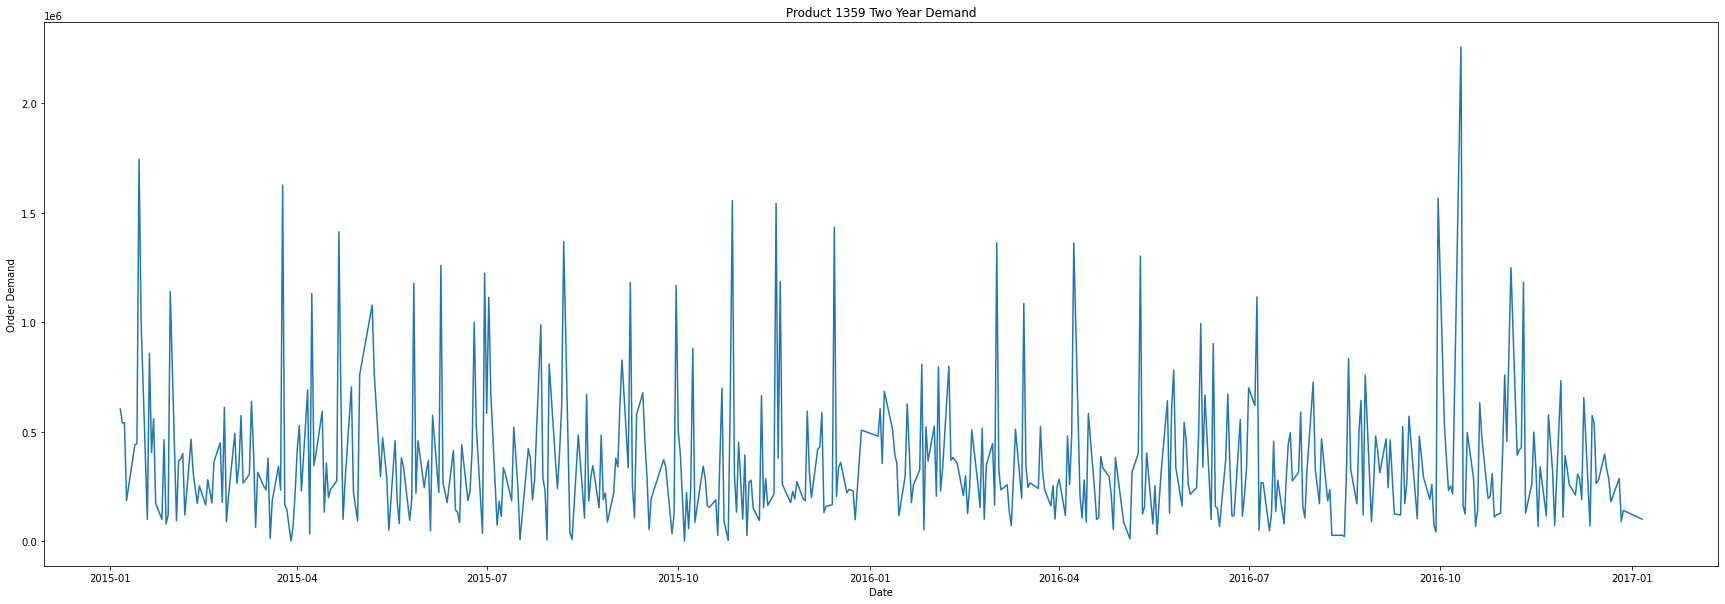

In [563]:
#Plot the data frame.
rcParams['figure.figsize'] = 30,10
plt.title('Product 1359 Two Year Demand')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.plot(two_yrs_1359['Date'],two_yrs_1359['Order_Demand'])

This is two years (2015 & 2016) of daily order demand data for Product 1359. It looks like there is an outlier around October 2016. 

In [564]:
#What are the minimum and maximum daily orders for product 1359 from 2015-2017?
two_yrs_1359['Order_Demand'].min() , two_yrs_1359['Order_Demand'].max()

(0, 2257000)

It seems like a 2,257,000 order demand day may be an outlier. 

In [565]:
#Plot without the outlier.
normal_1359 = two_yrs_1359[two_yrs_1359.Order_Demand <= 1999999]

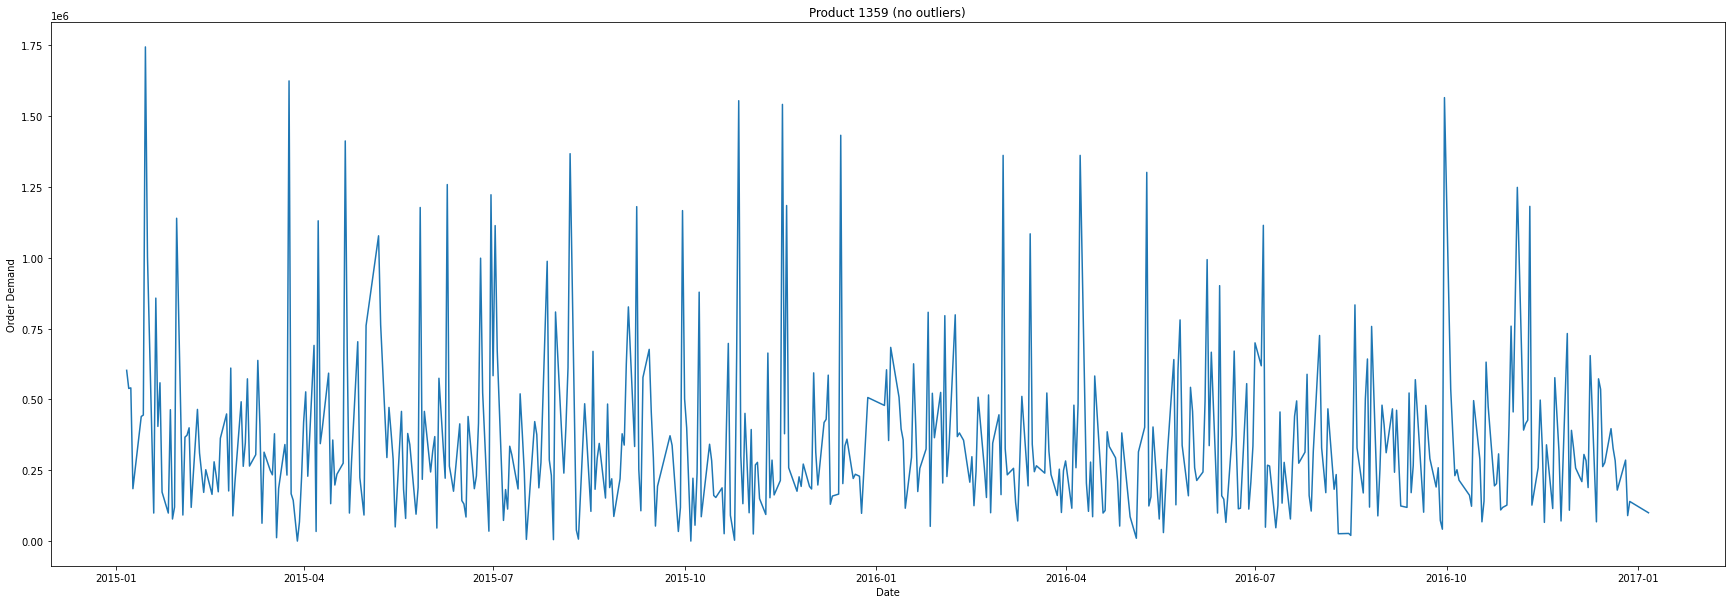

In [566]:
plt.title('Product 1359 (no outliers)')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.plot(normal_1359['Date'],normal_1359['Order_Demand'])

There seem to be peaks in order demand around every month or so. 

In [570]:
#To clean up the data further, we can replace the row numbers with the date for the index.
#This command is adapted from kashdotten (kaggle.com)
simple_1359 = normal_1359.set_index('Date')
simple_1359

,Order_Demand
Date,
2015-01-06,603000
2015-01-07,539000
2015-01-08,541000
2015-01-09,185000
2015-01-13,440000
...,...
2016-12-22,180000
2016-12-26,286000
2016-12-27,90000


This is what the new indexs now look like.

In [571]:
#Resample the dataset by an average of every week.
weekly_1359 = simple_1359['Order_Demand'].resample('W').mean()
print(weekly_1359)

Date
2015-01-11    467000.0
2015-01-18    908250.0
2015-01-25    418800.0
2015-02-01    380200.0
2015-02-08    270400.0
                ...   
2016-12-11    328800.0
2016-12-18    343400.0
2016-12-25    297250.0
2017-01-01    172000.0
2017-01-08    100000.0
Freq: W-SUN, Name: Order_Demand, Length: 105, dtype: float64


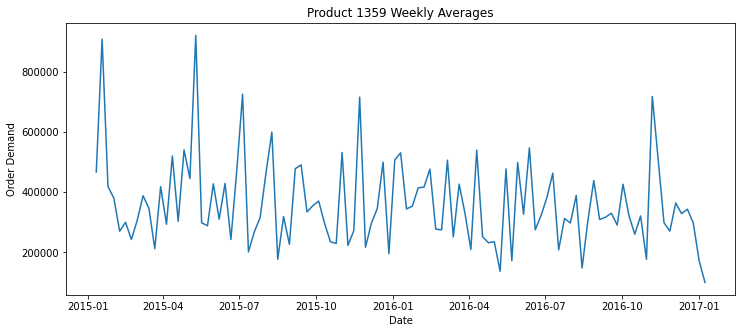

In [572]:
#Plot the weekly averages.
rcParams['figure.figsize'] = 12,5
plt.title('Product 1359 Weekly Averages')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.plot(weekly_1359)